# Początki: odczyt i zapis obrazu

**Aby móc przetwarzać obraz, najpierw należy wprowadzić go do środowiska. W zależności od użytej biblioteki, polecenie będzie inne, dlatego zebraliśmy je w jednym miejscu.**

Pamiętaj, by na początku załadować wymagane pakiety. Warto od razu nadać im własne, krótsze nazwy, ponieważ używając danej funkcji, należy wskazać, z&nbsp;jakiej biblioteki ona pochodzi. 

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

## Wczytanie obrazu

### lokalnego

* bilioteka Pillow

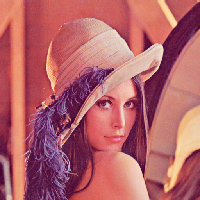

In [2]:
img_pil = Image.open('../obrazy_testowe/lena_512x512.png')
img_pil.resize((200,200))

* biblioteka matplotlib

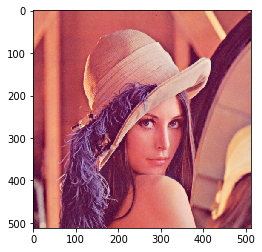

In [3]:
img_plt = plt.imread('../obrazy_testowe/lena_512x512.png')
plt.imshow(img_plt)
plt.show()

Biblioteka ta działa podobnie jak Matlab; znajdziemy w niej też funkcje _imread()_ oraz _imshow()_. Należy jednak dodać komendę _show()_, aby przedstawić obrazek. Wcześniej jest on zapisany jako macierz numpy, a nie w jako standardowa sekwencja Pythonowa (lista, krotka) – co oczywiście przekłada się na pewne różnice w operowaniu na tym obiekcie.

* biblioteka opencv

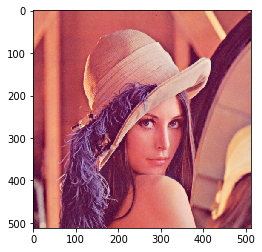

In [4]:
img_cv2 = cv2.imread('../obrazy_testowe/lena_512x512.png')
plt.imshow(img_cv2[:,:,::-1])
plt.show()

### Tak na prawdę wszystkie te biblioteki realizują to samo.

Dają nam przy tym wolność wyboru. 

Aby z obiektu PIL.Image uzyskać macierz w postaci SZERxWYSxRGB, należy przekształcić go do obiektu np.array

In [5]:
img_np = np.array(img_pil)

In [6]:
print('Pillow i matplotlib.pyplot robi to samo' if np.all(img_np == np.uint8(img_plt*255)) else 'robią co innego')

Pillow i matplotlib.pyplot robi to samo


Jedyna różnica to, że pillow wczytuje obrazy RGB 8-bitowe (*uint8*) w skali 0-255, a matplotlib.pyplot konweruje je na *floating* 0-1. Dlatego w celu porównania obu macierzy, zmienną img_plt przeskalowano do odpowiedniego zakresu i zmieniono jej typ.

## Obiekty PIL.Image umożliwiają też bardzo wiele wbudowanych transformacji wydajnymi metodami

* zmiana rozmiaru obrazu

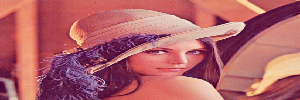

In [7]:
img_pil.resize((300,100))

* rotacja obrazu o zadany kąt

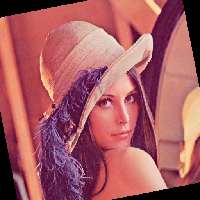

In [8]:
img_pil.rotate(11).resize((200,200))

* wybór fragmentu obrazu (o kształcie prostokąta)

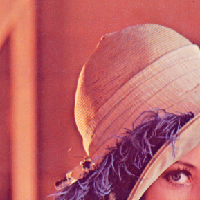

In [9]:
img_pil.crop((11,11,300,300)).resize((200,200))

**Opencv też ma wiele ciekawych funkcjonalności**

A część z nich poznasz w kolejnych rozdziałach, bo głównie na tej bibliotece oparty jest ten poradnik.

## Zapis obrazów w omawianych bibliotekach

In [10]:
img_pil.save('lena.png')

In [11]:
cv2.imwrite('lena.png',img_cv2)

True

In [12]:
plt.imsave('lena.png',img_plt)